In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [52]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [53]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [54]:
data = data.drop(columns= ['Department','Education','EducationField','Over18','StockOptionLevel','NumCompaniesWorked','JobInvolvement', 'DailyRate','EmployeeCount','DistanceFromHome','PercentSalaryHike'])

In [55]:
data.head(5)

,Age,Attrition,BusinessTravel,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1,2,Female,94,2,Sales Executive,4,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,2,3,Male,61,2,Research Scientist,2,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,4,4,Male,92,1,Laboratory Technician,3,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,5,4,Female,56,1,Research Scientist,3,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,7,1,Male,40,1,Laboratory Technician,2,...,3,4,80,6,3,3,2,2,2,2


In [9]:
data.tail(5)

,Age,Attrition,BusinessTravel,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,23,2061,3,Male,41,2,Laboratory Technician,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,6,2062,4,Male,42,3,Healthcare Representative,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,4,2064,2,Male,87,2,Manufacturing Director,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,2,2065,4,Male,63,2,Sales Executive,...,3,4,80,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,8,2068,2,Male,82,2,Laboratory Technician,...,3,1,80,6,3,4,4,3,1,2


In [10]:
data.shape

(1470, 26)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DistanceFromHome          1470 non-null   int64 
 4   EmployeeNumber            1470 non-null   int64 
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   HourlyRate                1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  MonthlyRate               1470 non-null   int64 
 14  OverTime                

In [57]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [56]:
data.isna().sum().sum()

np.int64(0)

In [14]:
data.duplicated().sum()

np.int64(0)

In [58]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [16]:
data.describe()

,Age,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1024.865306,2.721769,65.891156,2.063946,2.728571,6502.931293,14313.103401,15.209524,3.153741,2.712245,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,602.024335,1.093082,20.329428,1.106940,1.102846,4707.956783,7117.786044,3.659938,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,2.000000,48.000000,1.000000,2.000000,2911.000000,8047.000000,12.000000,3.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1020.500000,3.000000,66.000000,2.000000,3.000000,4919.000000,14235.500000,14.000000,3.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1555.750000,4.000000,83.750000,3.000000,4.000000,8379.000000,20461.500000,18.000000,3.000000,4.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,2068.000000,4.000000,100.000000,5.000000,4.000000,19999.000000,26999.000000,25.000000,4.000000,4.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [59]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

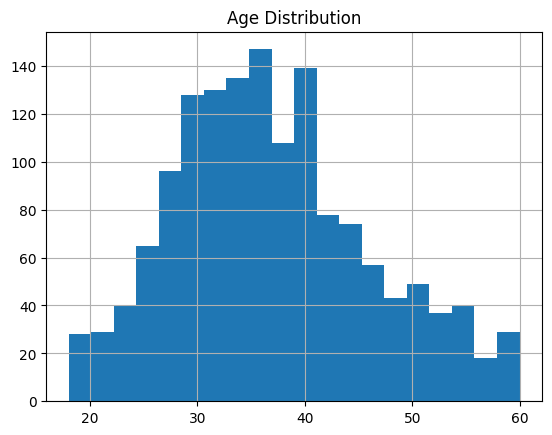

In [18]:
# Histograms for numerical columns
data['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

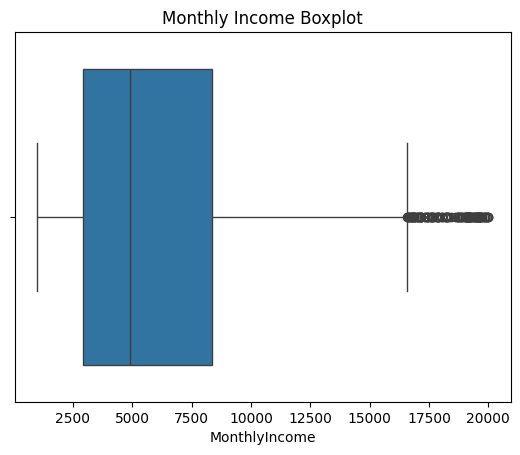

In [19]:
# Boxplot for outliers
sns.boxplot(x=data['MonthlyIncome'])
plt.title('Monthly Income Boxplot')
plt.show()

In [21]:
# Frequency of categories
print(data['Gender'].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64


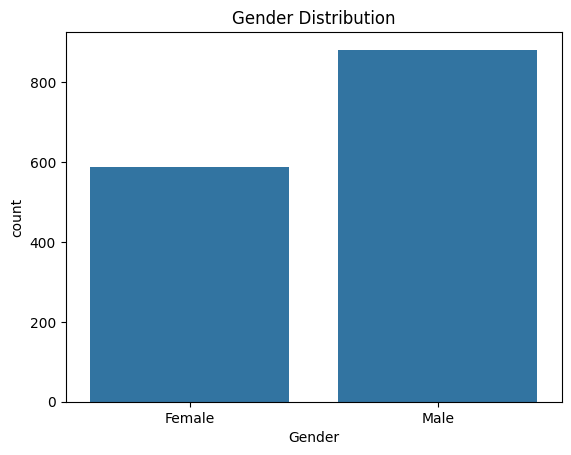

In [22]:
# Bar plot for categorical columns
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

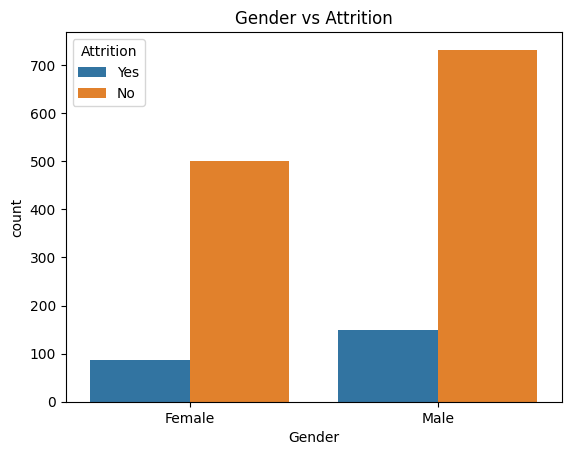

In [23]:
# Grouped bar plot (e.g., Gender vs Attrition)
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Gender vs Attrition')
plt.show()

In [24]:
# Target variable distribution
print(data['Attrition'].value_counts())


Attrition
No     1233
Yes     237
Name: count, dtype: int64


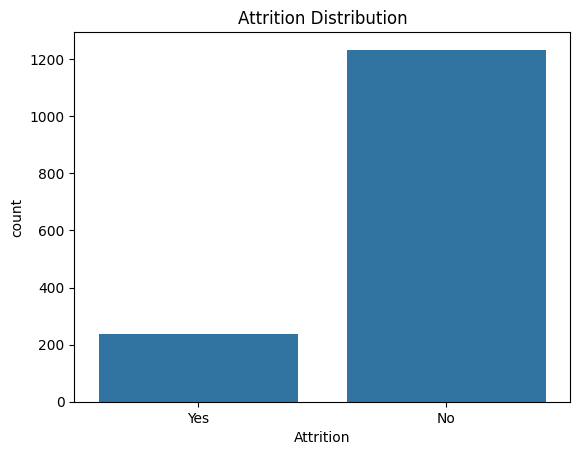

In [25]:
# Bar plot for Attrition
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

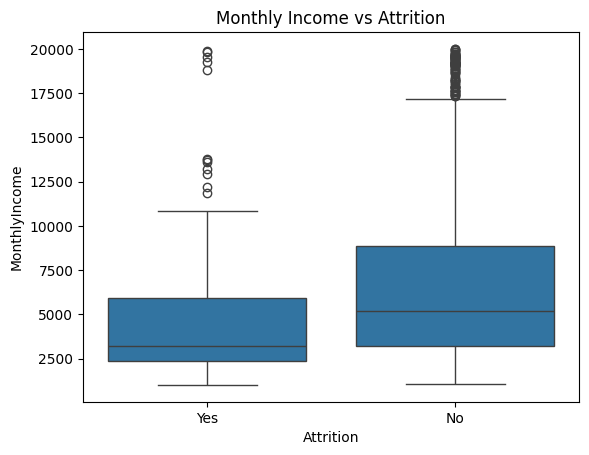

In [26]:
# Boxplot: MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income vs Attrition')
plt.show()

In [27]:
# Example: Create a new feature
data['PromotionRate'] = data['YearsSinceLastPromotion'] / data['YearsAtCompany']

# One-hot encoding for categorical columns
df = pd.get_dummies(data, columns=['Gender', 'MaritalStatus', 'JobRole'], drop_first=True)

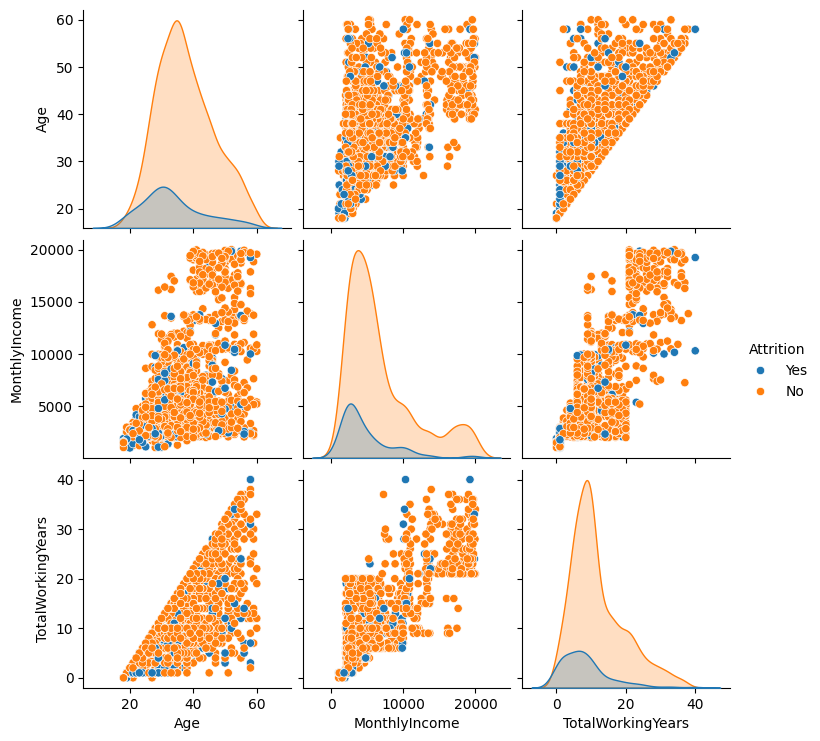

In [28]:
# Pair plot for numerical features
sns.pairplot(data[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'Attrition']], hue='Attrition')
plt.show()


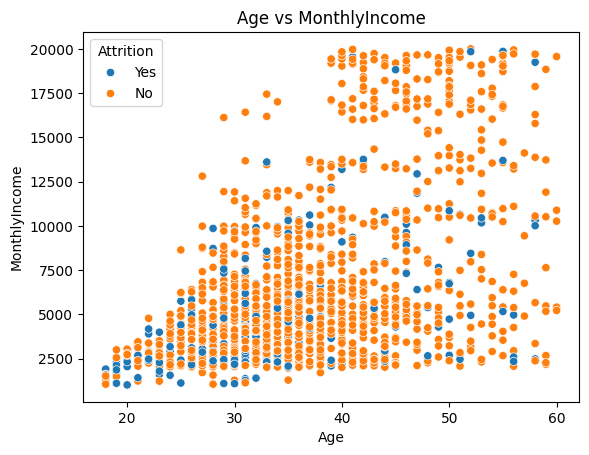

In [29]:
# Scatter plot: Age vs MonthlyIncome
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Age vs MonthlyIncome')
plt.show()


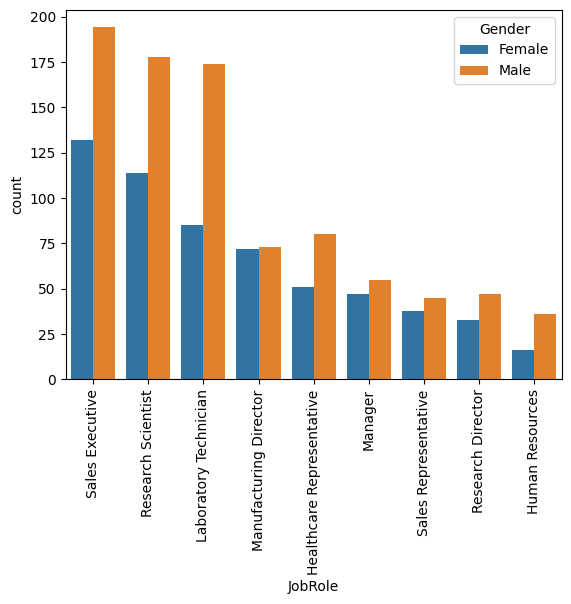

In [30]:
sns.countplot(x='JobRole', hue='Gender', data=data)
plt.xticks(rotation=90)
plt.show()

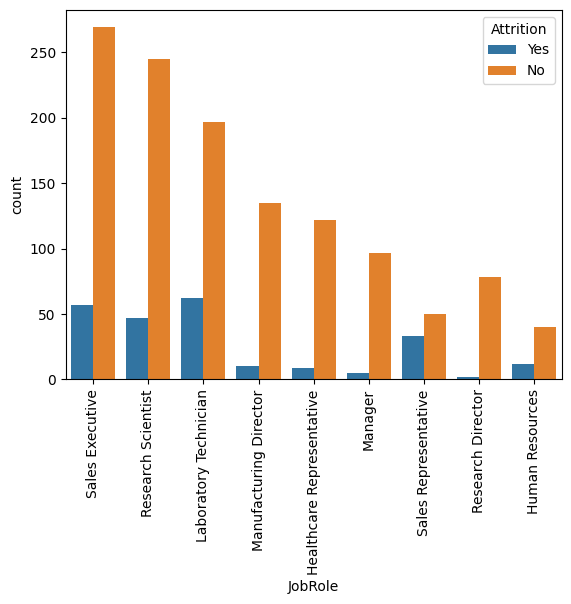

In [31]:
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xticks(rotation=90)
plt.show()

# Preprocess the Data

Encode Categorical Variables: Convert categorical features (e.g., Gender, MaritalStatus, OverTime) into numerical format using one-hot encoding or label encoding.

In [32]:
data = pd.get_dummies(data, columns=['Gender', 'MaritalStatus', 'OverTime', 'JobRole','BusinessTravel'], drop_first=True)

In [33]:
data.columns.value_counts().sum()

np.int64(36)

In [34]:
#Scale Numerical Features: Normalize or standardize numerical features
#(e.g., Age, MonthlyIncome, TotalWorkingYears).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'MonthlyIncome', 'TotalWorkingYears']] = scaler.fit_transform(data[['Age', 'MonthlyIncome', 'TotalWorkingYears']])

In [35]:
#Split Data: Split the dataset into training and testing sets.

from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.isnull().sum()
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train

In [37]:
X_test.isna().sum()
X_test = X_test.dropna()


In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\Star\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [40]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [294, 286]

# Explain Model Predictions


SHAP (SHapley Additive exPlanations)


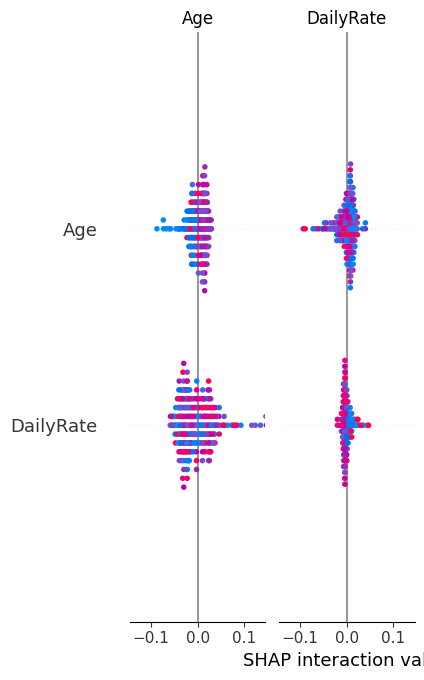

In [168]:
import shap

# Explain Random Forest model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

In [167]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 1.9 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 1.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.8/2.8 MB 1.5 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 1.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/30.3 MB ? eta -:--:--
   ---------------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.9 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/12.9 MB 2.1 MB/s eta 0:00:06
   ---- ----------------------------------- 1.6/12.9 MB 2.2 MB/s eta 0:00:06
   ---- ----------------------------------- 1.6/12.9 MB 2.2 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/12.9 MB 1.8 MB/s eta 0:00:07
  


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [170]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Attrition', 'Attrition'], verbose=True, mode='classification')
exp = explainer.explain_instance(X_test.iloc[0], model.predict_proba, num_features=10)
exp.show_in_notebook()

C:\Users\Star\AppData\Roaming\Python\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Star\AppData\Roaming\Python\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\Star\AppData\Roaming\Python\Python312\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

Intercept 0.3073498303510608
Prediction_local [0.2238728]
Right: 0.14


In [172]:
import joblib

# Save the model
joblib.dump(model, 'employee_attrition_model.pkl')

['employee_attrition_model.pkl']